Synthetisch Time Series - tägl. saisonal 
Von hier: https://towardsdatascience.com/creating-synthetic-time-series-data-67223ff08e34



# Seasonal Series1 (Sinus Seasonality / linear trend with one change / noise)

In [4]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
series = pd.date_range(start='2016-01-01', end='2021-12-31', freq='D')
df_season = pd.DataFrame(columns=['date', 'sin'])
df_season.date=series
df_season.sin = 1 * np.sin(0.01721420632 * df_season.index + 0) + 1

<AxesSubplot:xlabel='date'>

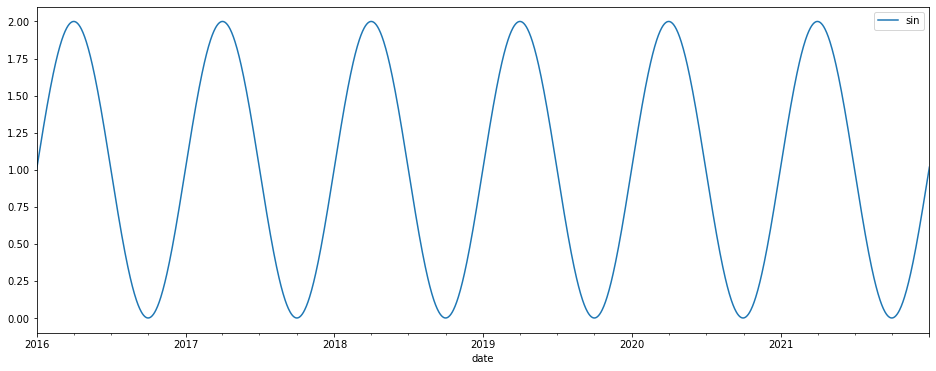

In [4]:
df_season.plot(y="sin", x="date", figsize=(16,6))

<AxesSubplot:xlabel='date'>

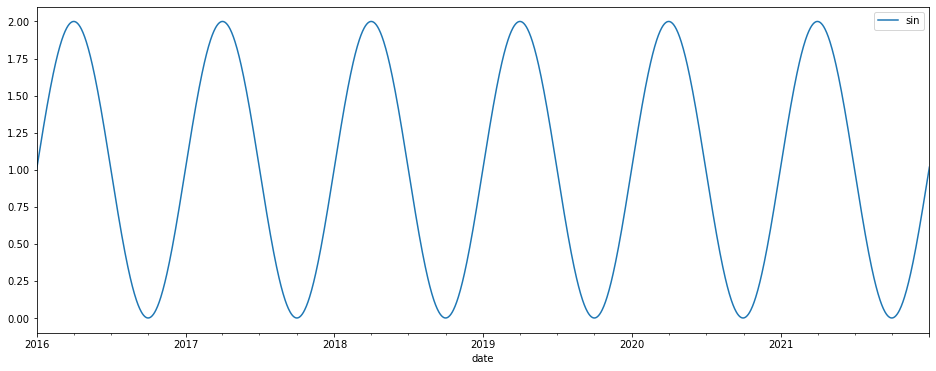

In [6]:
df_season.plot(y="sin", x="date", figsize=(16,6))

## Daten normalisieren

In [9]:
df_season["sinN"] = (df_season["sin"] - df_season["sin"].min()) / (df_season["sin"].max() - df_season["sin"].min())
df_season.head()

,date,sin,sinN
0,2016-01-01,1.000000,0.500000
1,2016-01-02,1.017213,0.508607
2,2016-01-03,1.034422,0.517211
3,2016-01-04,1.051620,0.525810
4,2016-01-05,1.068802,0.534402


## Daten Standardisieren

In [13]:
import math
mean = sum(df_season['sin']) / len(df_season)
#value1 = (forecast['yearly'] - mean)**2
#value = sum((forecast['yearly'] - mean)^2)
standard_deviation = math.sqrt( sum((df_season['sin'] - mean)**2 ) / len(df_season))
df_season['sinD']= (df_season['sin'] - mean) / standard_deviation
df_season.head()

df_season.to_csv("series1_Yearly.csv",index=False)

(17167.0, 17531.0)

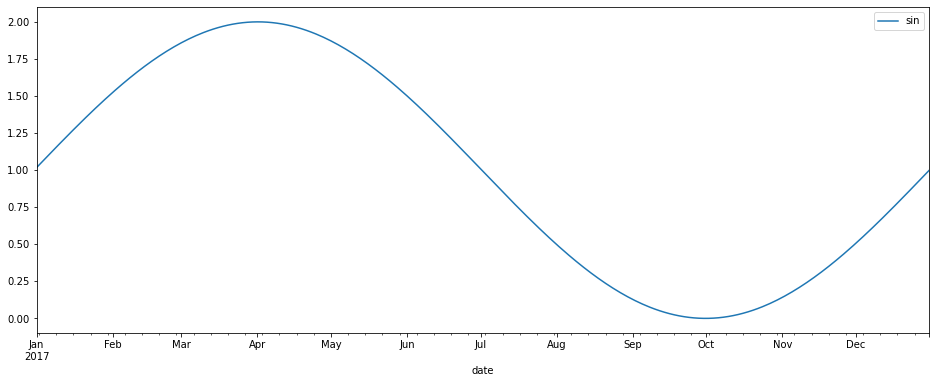

In [24]:
df_season.plot(y="sin", x="date", figsize=(16,6))
plt.xlim('2017-01-01','2017-12-31')

# Trend Series

### Eine Zeitreihe mit Pandas erstellen

In [1]:
import pandas as pd
# Generate series from start of 2016 to end of 2020
series = pd.date_range(start='2016-01-01', end='2021-12-31', freq='D')
df = pd.DataFrame(columns=['date', 'trend'])
df.date=series
df.head()

,date,trend
0,2016-01-01,NaN
1,2016-01-02,NaN
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN


In [7]:
# random number
#df['trend'] = np.random.randint(0, 42, size)
# linear trend
#df['trend'] = 1-0.1*df.index
# quadratic trend
#df['sin'] = 1+0.1*df.index + 0.01 * df.index**2

### Daten erstellen Trend mit changepoint

In [2]:
# series = pd.date_range(start='2016-01-01', end='2021-12-31', freq='D')
df2 = pd.DataFrame(columns=['date', 'trend'])
df2.date=series
print(len(df2))
df2.head()

2192


,date,trend
0,2016-01-01,NaN
1,2016-01-02,NaN
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN


In [9]:
df2.loc[0:1200,"trend"] = 1+0.5*np.linspace(1,1201,1201)
df2.loc[1201:2192,"trend"] = 601-0.2*np.linspace(1,991,991)
print(df2.head())
df2.loc[1200]

        date trend    trendN
0 2016-01-01   1.5       1.0
1 2016-01-02   2.0  1.000833
2 2016-01-03   2.5  1.001667
3 2016-01-04   3.0    1.0025
4 2016-01-05   3.5  1.003333


date      2019-04-15 00:00:00
trend                   601.5
trendN                    2.0
Name: 1200, dtype: object

### Daten Normalisieren

In [7]:
df2["trendN"] = (df2["trend"] - df2["trend"].min()) / (df2["trend"].max() - df2["trend"].min())+1
df2.head()

,date,trend,trendN
0,2016-01-01,1.5,1.0
1,2016-01-02,2.0,1.000833
2,2016-01-03,2.5,1.001667
3,2016-01-04,3.0,1.0025
4,2016-01-05,3.5,1.003333


<AxesSubplot:xlabel='date'>

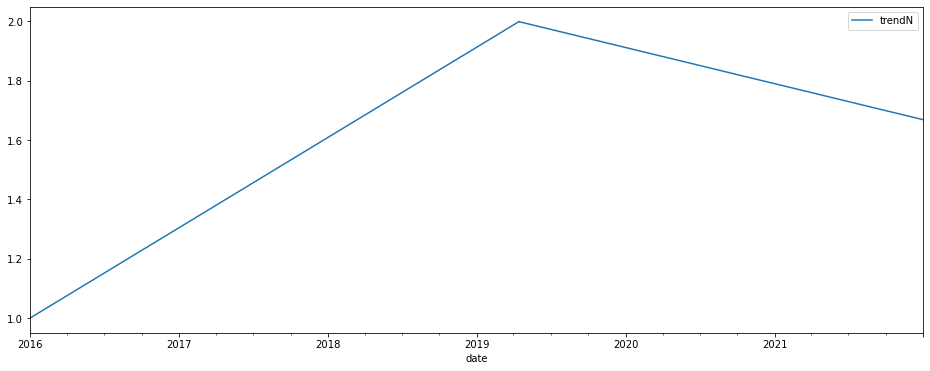

In [8]:
df2.plot(y="trendN", x="date", figsize=(16,6))

# Noise Series

In [26]:
df_noise = pd.DataFrame(columns=['date', 'noise'])
df_noise.date=series
noise = np.random.normal(1,0.2,2192)
df_noise.noise=noise

In [27]:
print(df_noise.head())
print(df_noise['noise'].min())
print(df_noise['noise'].max())

        date     noise
0 2016-01-01  0.537495
1 2016-01-02  1.126674
2 2016-01-03  1.065885
3 2016-01-04  1.155557
4 2016-01-05  1.305946
0.3030292755952977
1.6701867532380983


# 

## normalize

In [16]:
#df_noise['noise'] = (df_noise['noise'] - df_noise['noise'].min()) / (df_noise['noise'].max() - df_noise['noise'].min())

<AxesSubplot:xlabel='date'>

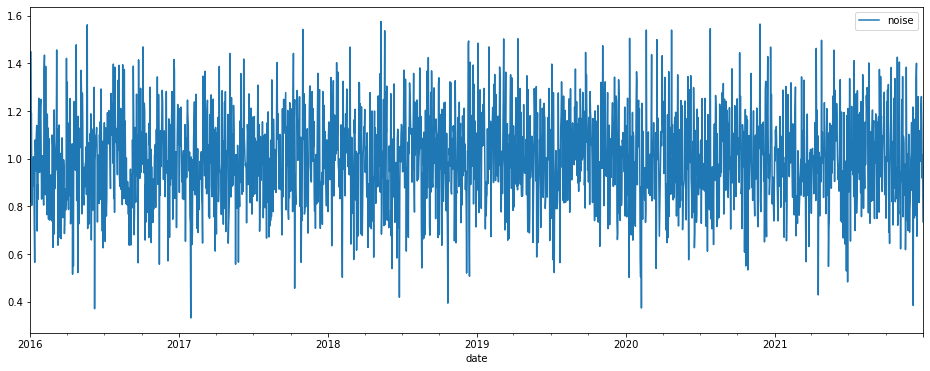

In [20]:
df_noise.plot(y="noise", x="date", figsize=(16,6))

# Additive Model 

In [30]:
df_combination = pd.DataFrame(columns=['date', 'Sum_TSN'])
df_combination.date=series
#df_combination.Sum_TS =df_season["sin"] + df2["trend"]
df_combination.Sum_TSN = df_season["sin"] + df2["trendN"] + df_noise['noise']
df_combination.head()


,date,Sum_TSN
0,2016-01-01,2.537495
1,2016-01-02,3.144721
2,2016-01-03,3.101974
3,2016-01-04,3.209677
4,2016-01-05,3.378082


<AxesSubplot:xlabel='date'>

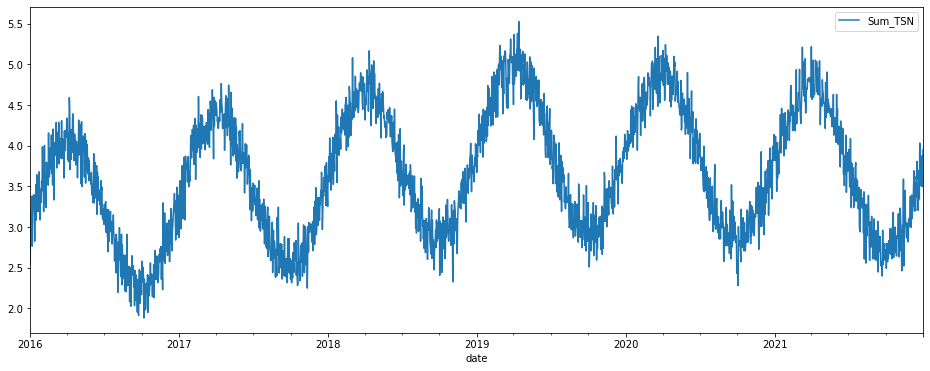

In [31]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

### normalize

In [32]:
df_combination['Sum_TSN'] = (df_combination['Sum_TSN'] - df_combination['Sum_TSN'].min()) / (df_combination['Sum_TSN'].max() - df_combination['Sum_TSN'].min())
df_combination.head()

,date,Sum_TSN
0,2016-01-01,0.179728
1,2016-01-02,0.346334
2,2016-01-03,0.334605
3,2016-01-04,0.364156
4,2016-01-05,0.410361


<AxesSubplot:xlabel='date'>

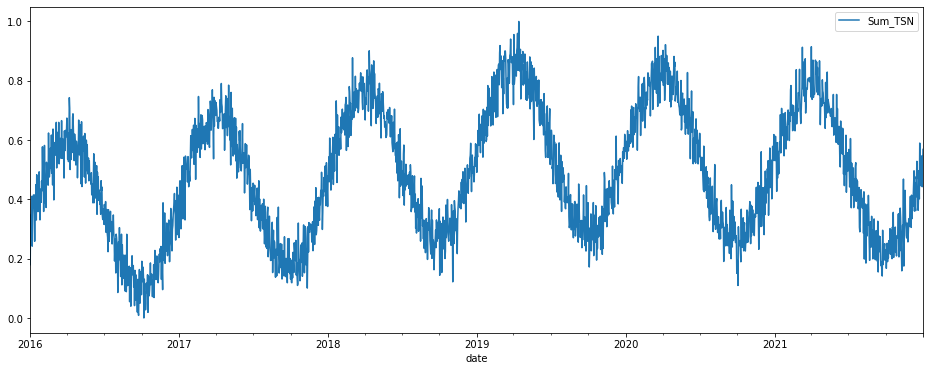

In [33]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [ ]:
#plt.savefig('FC_DaylightSavingWithReg.png')

In [45]:
df_combination.to_csv("series1_normalized.csv")

In [38]:
df_true = pd.DataFrame(columns=['date', 'trueYaddN','trueYearly','trueYearlyN', 'trueTrend','trueTrendN', 'trueNoise'])
df_true.date = series 
df_true.trueYaddN = df_combination['Sum_TSN']
df_true.trueYearly = df_season["sin"]
df_true.trueYearlyN = df_season["sinN"]
df_true.trueTrend=df2["trend"]
df_true.trueTrendN=df2["trendN"]
df_true.trueNoise = df_noise['noise']
df_true.head()

,date,trueYaddN,trueYearly,trueYearlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.179728,1.000000,0.500000,1.5,1.0,0.537495
1,2016-01-02,0.346334,1.017213,0.508607,2.0,1.000833,1.126674
2,2016-01-03,0.334605,1.034422,0.517211,2.5,1.001667,1.065885
3,2016-01-04,0.364156,1.051620,0.525810,3.0,1.0025,1.155557
4,2016-01-05,0.410361,1.068802,0.534402,3.5,1.003333,1.305946


<AxesSubplot:xlabel='date'>

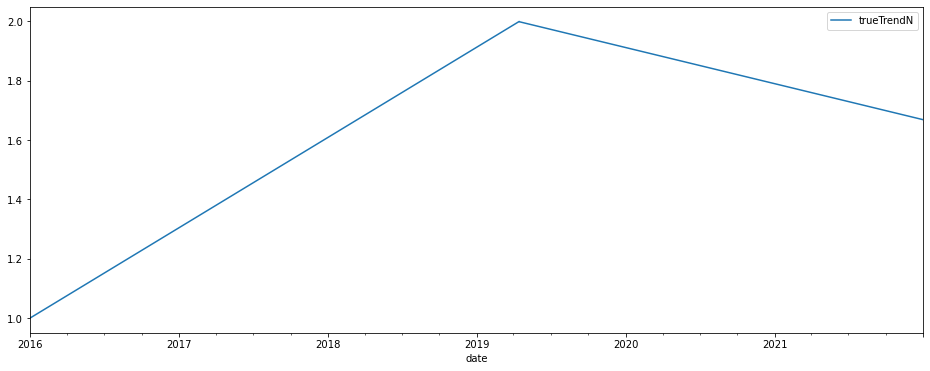

In [43]:
df_true.plot(y="trueTrendN", x="date", figsize=(16,6))

In [44]:
df_true.to_csv("series1_complete.csv",index=False)